In [1]:
#----------------------------------------------------------------Customer Segmentation----------------------------------------------------------------

# most importnt columns
# Customer_ID
# Age
# Gender
# Location
# Income Level
# Number of Active Policies
# Total Premium Paid
# Policy Upgrades

In [60]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [61]:
df = pd.read_csv("C:/Users/91801/Desktop/Insurance Project/dataset/customer_segmentation.csv")
df.head()

,Customer_ID,Age,Gender,Location,Occupation,Income_Level,Insurance_Products_Owned,Coverage_Amount,Premium_Amount,Policy_Type
0,84966,23,Female,Mizoram,Entrepreneur,70541,policy2,366603,2749,Group
1,95568,26,Male,Goa,Manager,54168,policy1,780236,1966,Group
2,10544,29,Female,Rajasthan,Entrepreneur,73899,policy3,773926,4413,Group
3,77033,20,Male,Sikkim,Entrepreneur,63381,policy2,787815,4342,Family
4,88160,25,Female,West Bengal,Manager,38794,policy4,366506,1276,Family


In [62]:
# change the columns to lowercase
df.columns = df.columns.str.lower()

In [63]:
# extarct ploicy upgrade
policy_types = {
    "Individual": 0,
    "Family": 1,
    "Group": 2,
    "Business": 3
}

df["policy_upgrades"] = df["policy_type"].map(policy_types)

In [64]:
# extract number_of_policies
df["number_of_policies"] = df["insurance_products_owned"].str.extract(r"policy(\d)").astype(int)

In [65]:
# join the redundant values
loacations = {
    "Dadra and Nagar Haveli" : "Dadra and Nagar Haveli & Daman and Diu",
    "Daman and Diu" : "Dadra and Nagar Haveli & Daman and Diu"
}

df["location"] = df["location"].replace(loacations)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               53503 non-null  int64 
 1   age                       53503 non-null  int64 
 2   gender                    53503 non-null  object
 3   location                  53503 non-null  object
 4   occupation                53503 non-null  object
 5   income_level              53503 non-null  int64 
 6   insurance_products_owned  53503 non-null  object
 7   coverage_amount           53503 non-null  int64 
 8   premium_amount            53503 non-null  int64 
 9   policy_type               53503 non-null  object
 10  policy_upgrades           53503 non-null  int64 
 11  number_of_policies        53503 non-null  int32 
dtypes: int32(1), int64(6), object(5)
memory usage: 4.7+ MB


In [67]:
df.describe()

,customer_id,age,income_level,coverage_amount,premium_amount,policy_upgrades,number_of_policies
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447,1.698821,2.801263
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295,1.031347,1.451416
min,1.000000,18.000000,20001.000000,50001.000000,500.000000,0.000000,1.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000,1.000000,2.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000,2.000000,3.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000,3.000000,4.000000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000,3.000000,5.000000


In [68]:
df.describe(include="object")

,gender,location,occupation,insurance_products_owned,policy_type
count,53503,53503,53503,53503,53503
unique,2,34,9,5,4
top,Male,Dadra and Nagar Haveli & Daman and Diu,Salesperson,policy1,Group
freq,27499,2915,7919,13365,18255


<Axes: xlabel='age', ylabel='Count'>

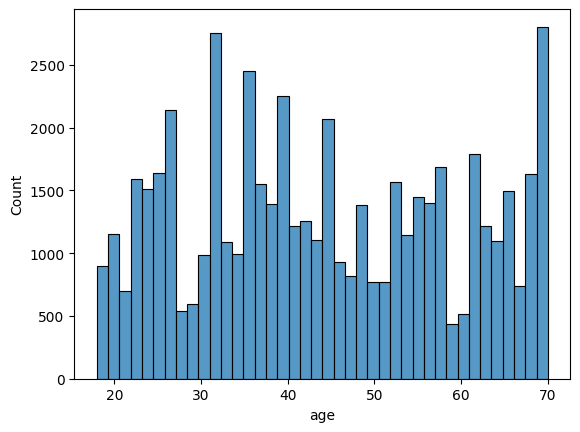

In [69]:
sns.histplot(df["age"])

<Axes: xlabel='gender', ylabel='count'>

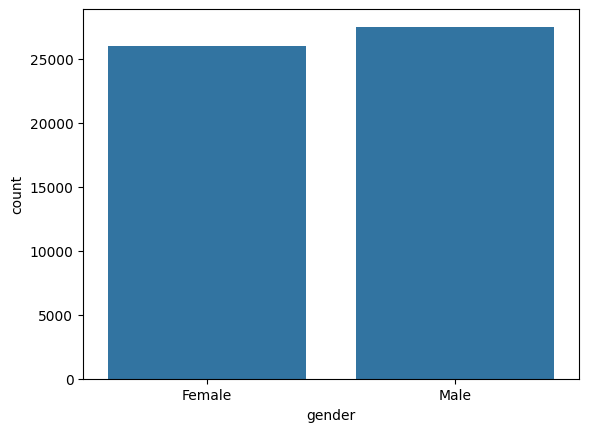

In [70]:
sns.countplot(x=df["gender"])

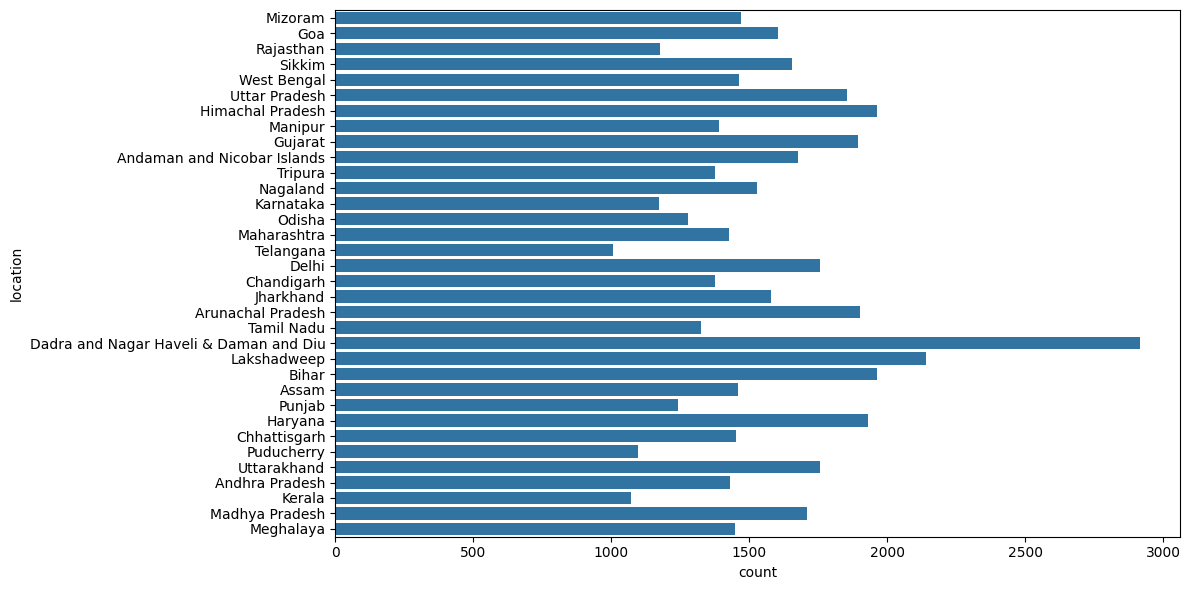

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(df["location"])
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='occupation'>

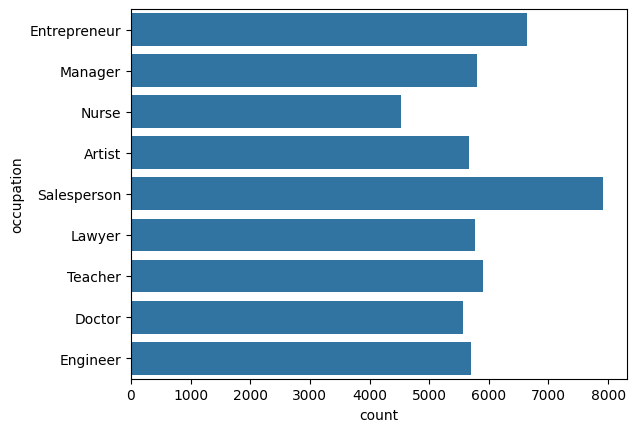

In [72]:
sns.countplot(df["occupation"])

<Axes: xlabel='income_level', ylabel='Count'>

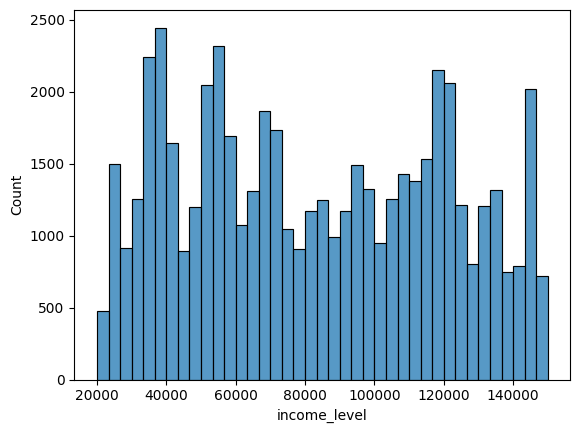

In [73]:
sns.histplot(df["income_level"])

<Axes: xlabel='coverage_amount', ylabel='Count'>

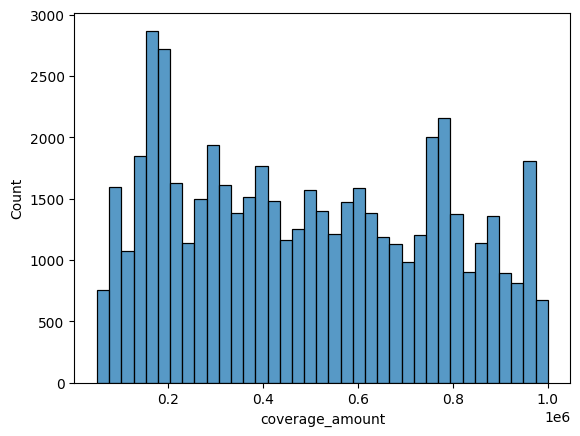

In [74]:
sns.histplot(df["coverage_amount"])

<Axes: xlabel='premium_amount', ylabel='Count'>

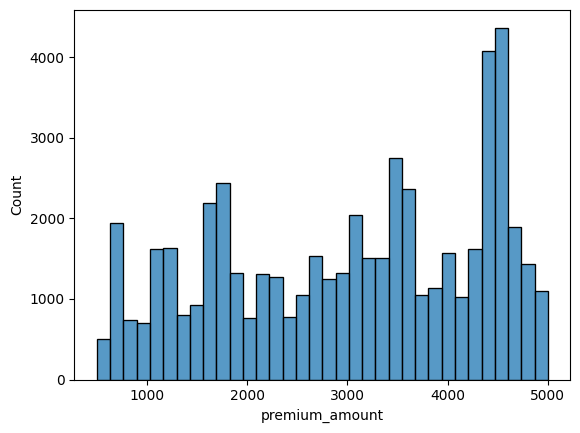

In [75]:
sns.histplot(df["premium_amount"])

<Axes: xlabel='count', ylabel='policy_type'>

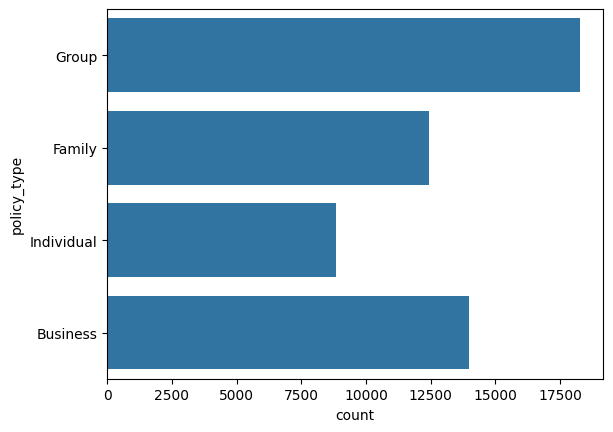

In [76]:
sns.countplot(df["policy_type"])

<Axes: xlabel='policy_upgrades', ylabel='Count'>

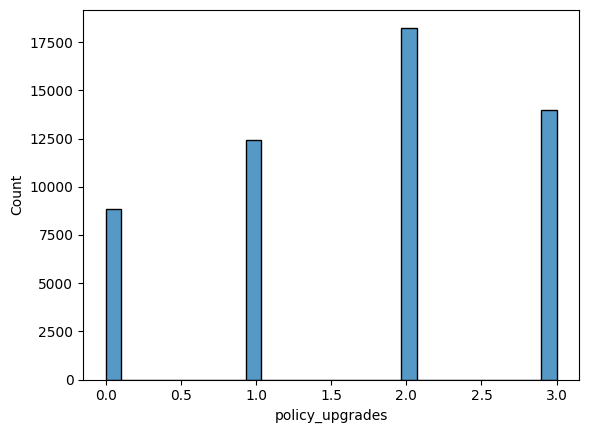

In [19]:
sns.histplot(df["policy_upgrades"])

<Axes: xlabel='number_of_policies', ylabel='Count'>

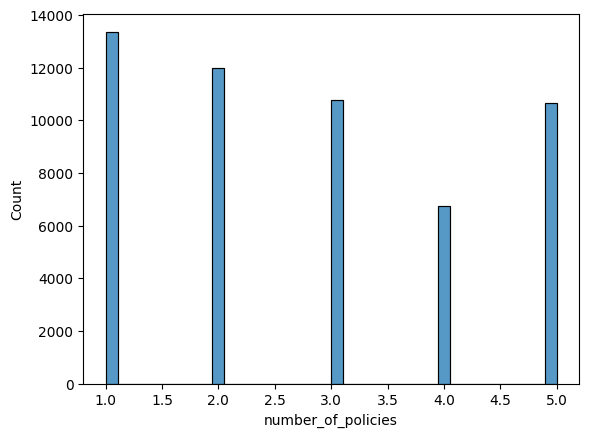

In [20]:
sns.histplot(df["number_of_policies"])

<Axes: xlabel='gender', ylabel='count'>

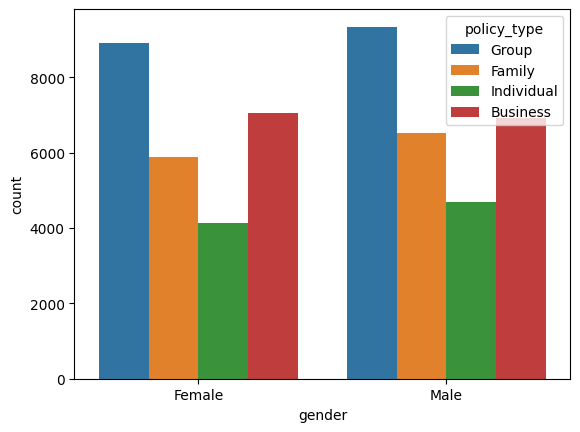

In [21]:
sns.countplot(x=df["gender"], hue=df["policy_type"])

<Axes: xlabel='count', ylabel='location'>

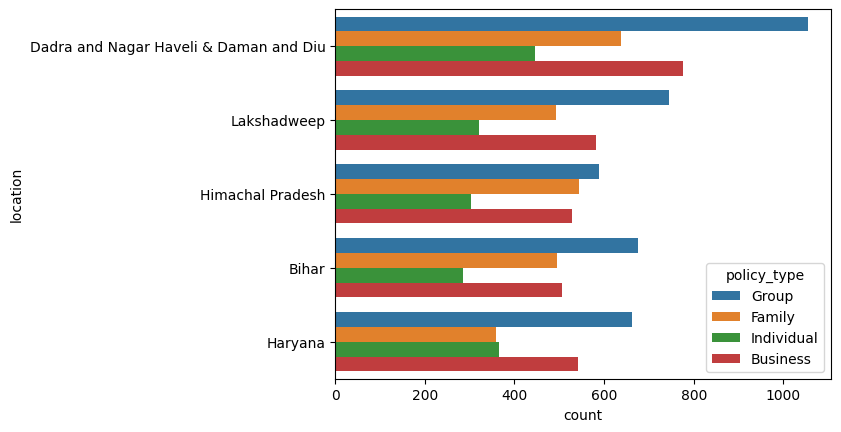

In [22]:
sns.countplot(data=df, y="location", hue="policy_type", order=df["location"].value_counts().index[:5])

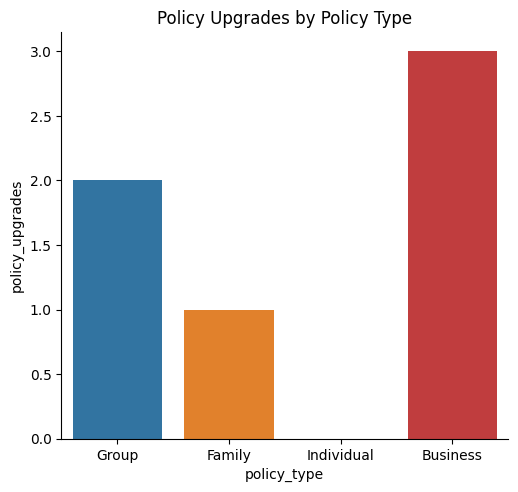

In [146]:
sns.catplot(data=df, x="policy_type", y="policy_upgrades", hue="policy_type", kind="bar", aspect=1.1, height=4.8)
plt.title("Policy Upgrades by Policy Type")
plt.show()

In [ ]:
sns.catplot(data=df, y="coverage_amount", x="policy_type", hue="policy_type", kind="bar", aspect=1.1, height=4.8)
plt.title("Coverage by Policy Type")
plt.show()

<Axes: xlabel='count', ylabel='occupation'>

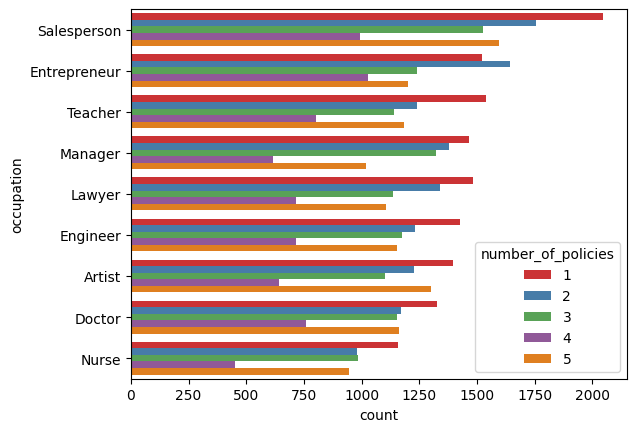

In [23]:
# Salespersons thay are mostly purchase one or two type of policy
# doctor, artist, engineer, lawyer are purchase same pattern so recommend policies same as well
# nurse can focus to buy all type of policies 

sns.countplot(data=df, y="occupation", hue="number_of_policies", order=df["occupation"].value_counts().index, palette="Set1")

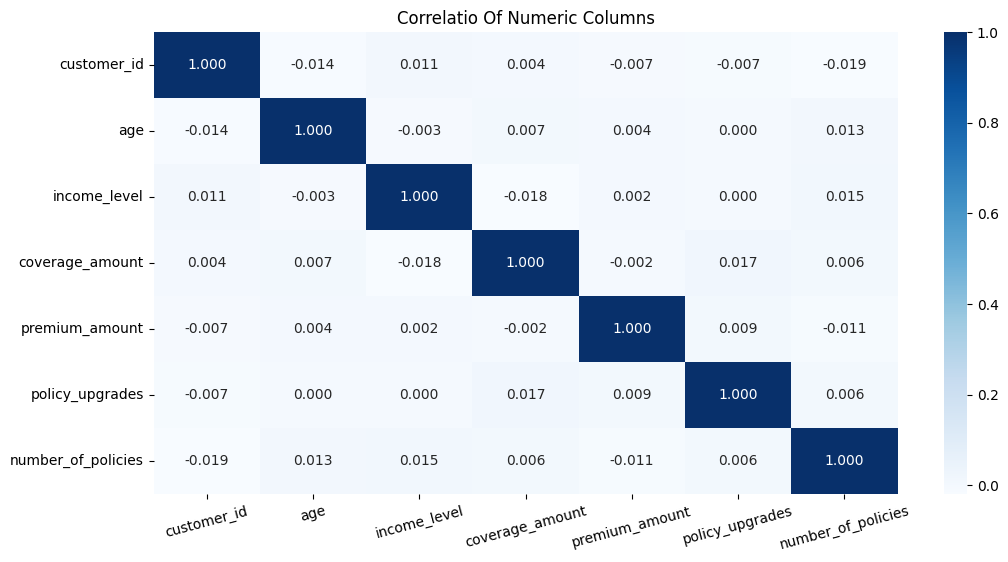

In [24]:
# if premium amount is high, then customer might only be able to manage few policies that mean negative correlation
# if coverage is high, policy upgrades are likely to be higher, so upgrade business or group level. that mean positive correlation
# higher income customers can afford and manage more policies. that mean positive correlation

plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlatio Of Numeric Columns")
plt.xticks(rotation=15)
plt.show()

In [25]:
# one hot Encoding

one_hot_encode = df[["gender", "occupation"]]
one_hot_encode = pd.get_dummies(one_hot_encode, columns=["gender", "occupation"], drop_first=True).astype(int)

In [26]:
# Label Encoding

df["location"] = LabelEncoder().fit_transform(df["location"])

In [27]:
#remove and add encoded columns
feature = df.drop(columns=["customer_id", "gender", "occupation", "insurance_products_owned", "policy_type"], inplace=True)

feature = pd.concat([df, one_hot_encode],axis=1)

In [28]:
# feature selection

x = feature

In [29]:
# feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [30]:
model = KMeans(n_clusters=3, random_state=0)

In [31]:
model.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [32]:
y_pred = model.predict(x_scaled)

In [33]:
silhouette_score(x_scaled, y_pred)

0.11557237959097451

In [34]:
df["cluster"] = model.labels_

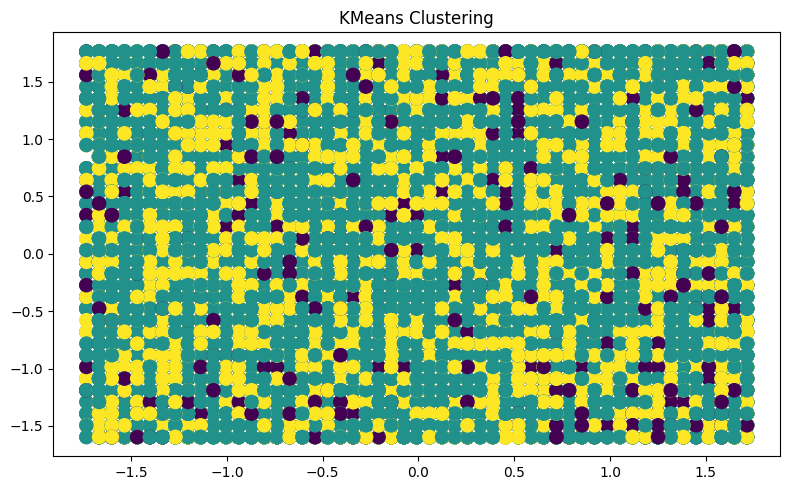

In [36]:
plt.figure(figsize=(8, 5))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=df["cluster"], s=90)
plt.title("KMeans Clustering")
plt.tight_layout()
plt.show()

In [37]:
df["cluster"].value_counts()

cluster
1    31799
2    17183
0     4521
Name: count, dtype: int64

In [38]:
cluster_labels = {
    0 : "Premium Passive",
    1 : "Mainstream",
    2 : "Engaged Multipolicy"
}
df["cluster_label"] = df["cluster"].map(cluster_labels)

In [39]:
# Engaged Multipolicy - Actively managing multiple policies and upgrading frequently
# Mainstreat - Average customer with moderate spending and engagement
# Premium Passive - High spenders with good coverage but low engagement or upgrades

df.groupby("cluster_label").mean().T

cluster_label,Engaged Multipolicy,Mainstream,Premium Passive
age,44.004481,44.203686,44.218315
location,15.671710,15.692223,15.733908
income_level,82178.796659,82949.975219,83731.283123
coverage_amount,492385.672060,491881.683544,498239.621765
premium_amount,2996.754699,3043.612975,2986.079850
policy_upgrades,1.695571,1.707569,1.649635
number_of_policies,2.828726,2.788421,2.787215
cluster,2.000000,1.000000,0.000000


In [40]:
model = Pipeline([
    ("scaler", scaler),
    ("model", model)
])
joblib.dump(model, "C:/Users/91801/Desktop/Insurance Project/models/customer_segmentation.pkl")

['C:/Users/91801/Desktop/Insurance Project/models/customer_segmentation.pkl']

In [41]:
model = joblib.load("C:/Users/91801/Desktop/Insurance Project/models/customer_segmentation.pkl")
model.predict([[23,21,70541,366603,2749,2,2,0,0,0,1,0,0,0,0,0]]) #2nd - [[25,3,49258,631057,4407,0,1,1,0,0,0,0,0,0,0,1]]

C:\Users\91801\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])